In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [2]:
GBvideo = pd.read_csv("GBvideos_col_centiment_analysis.csv", index_col = "video_id", error_bad_lines=False) #,
GBvideo_1 = pd.read_csv("data_With_Cleaned_columns.csv", index_col = "video_id",  error_bad_lines=False)# , index_col = "video_id",
GBvideo_1.info()

C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,13,14,20,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to JtIY1Naxg0M
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38916 non-null  int64  
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  389

In [3]:
GBvideo_1['tags_words'] = GBvideo_1['tags'].apply(lambda n: len(n.split(' ')))
GBvideo_1['title_words'] = GBvideo_1['title'].apply(lambda n: len(n.split(' ')))

In [4]:
GBvideo_1_U = GBvideo_1[["tags_words", "title_words", "category_names"]]
GBvideo_1_U.shape 

(38916, 3)

In [6]:
GBvideo_U= GBvideo[["category_id", 
                    "views",
                    "tag_length",
                    "description_length",
                    "title_length",
                    "category_names_length",
                    "channel_title_length",
                    "Analysis_title",   
                    "Analysis_tags",              
                    "Analysis_descrp"]]
GBvideo_U.shape

(39235, 10)

In [7]:
df = pd.merge(GBvideo_U, GBvideo_1_U, on = "video_id")
df

,category_id,views,tag_length,description_length,title_length,category_names_length,channel_title_length,Analysis_title,Analysis_tags,Analysis_descrp,tags_words,title_words,category_names
video_id,,,,,,,,,,,,,
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...
p1DAEZNyJ8E,29.0,3296668.0,448.0,NaN,43.0,21,21.0,Negative,Negative,Neutral,113,8,Nonprofits Activism
p1DAEZNyJ8E,29.0,3296668.0,448.0,NaN,43.0,21,21.0,Negative,Negative,Neutral,113,8,Nonprofits Activism
p1DAEZNyJ8E,29.0,3296668.0,448.0,NaN,43.0,21,21.0,Negative,Negative,Neutral,113,8,Nonprofits Activism


In [8]:
df.isna().sum()

category_id                  0
views                        0
tag_length                1167
description_length       11149
title_length              1167
category_names_length     1167
channel_title_length      1167
Analysis_title            1167
Analysis_tags             1167
Analysis_descrp           1167
tags_words                   0
title_words                  0
category_names               0
dtype: int64

In [9]:
newdf = df.dropna()
newdf.isna().sum()

category_id              0
views                    0
tag_length               0
description_length       0
title_length             0
category_names_length    0
channel_title_length     0
Analysis_title           0
Analysis_tags            0
Analysis_descrp          0
tags_words               0
title_words              0
category_names           0
dtype: int64

In [10]:
newdf.duplicated().sum()

660038

In [11]:
newdf = newdf.drop_duplicates()
newdf

,category_id,views,tag_length,description_length,title_length,category_names_length,channel_title_length,Analysis_title,Analysis_tags,Analysis_descrp,tags_words,title_words,category_names
video_id,,,,,,,,,,,,,
Jw1Y-zhQURU,26.0,7224515.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7563254.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,7727696.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,8041928.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
Jw1Y-zhQURU,26.0,8151265.0,149.0,821.0,45.0,13,10.0,Neutral,Neutral,Positive,35,7,Howto Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...
j1oMVG1ZMlA,29.0,115867.0,6.0,296.0,36.0,21,19.0,Neutral,Neutral,Negative,1,7,Nonprofits Activism
j1oMVG1ZMlA,29.0,117365.0,6.0,296.0,36.0,21,19.0,Neutral,Neutral,Negative,1,7,Nonprofits Activism
j1oMVG1ZMlA,29.0,120274.0,6.0,296.0,36.0,21,19.0,Neutral,Neutral,Negative,1,7,Nonprofits Activism


In [12]:
newdf.to_csv("GBvideo_cleaned.csv")

In [13]:
corr_mat = newdf.corr()
corr_mat

,category_id,views,tag_length,description_length,title_length,channel_title_length,tags_words,title_words
category_id,1.000000,-0.173060,0.122858,0.098205,0.070777,0.052012,0.104630,-0.006478
views,-0.173060,1.000000,-0.013397,-0.010873,-0.039503,-0.038195,-0.001222,-0.006449
tag_length,0.122858,-0.013397,1.000000,0.318500,0.258463,-0.030662,0.959498,0.213599
description_length,0.098205,-0.010873,0.318500,1.000000,0.097113,0.031669,0.306602,0.093821
title_length,0.070777,-0.039503,0.258463,0.097113,1.000000,-0.026754,0.217709,0.909883
channel_title_length,0.052012,-0.038195,-0.030662,0.031669,-0.026754,1.000000,-0.025008,-0.063353
tags_words,0.104630,-0.001222,0.959498,0.306602,0.217709,-0.025008,1.000000,0.198016
title_words,-0.006478,-0.006449,0.213599,0.093821,0.909883,-0.063353,0.198016,1.000000


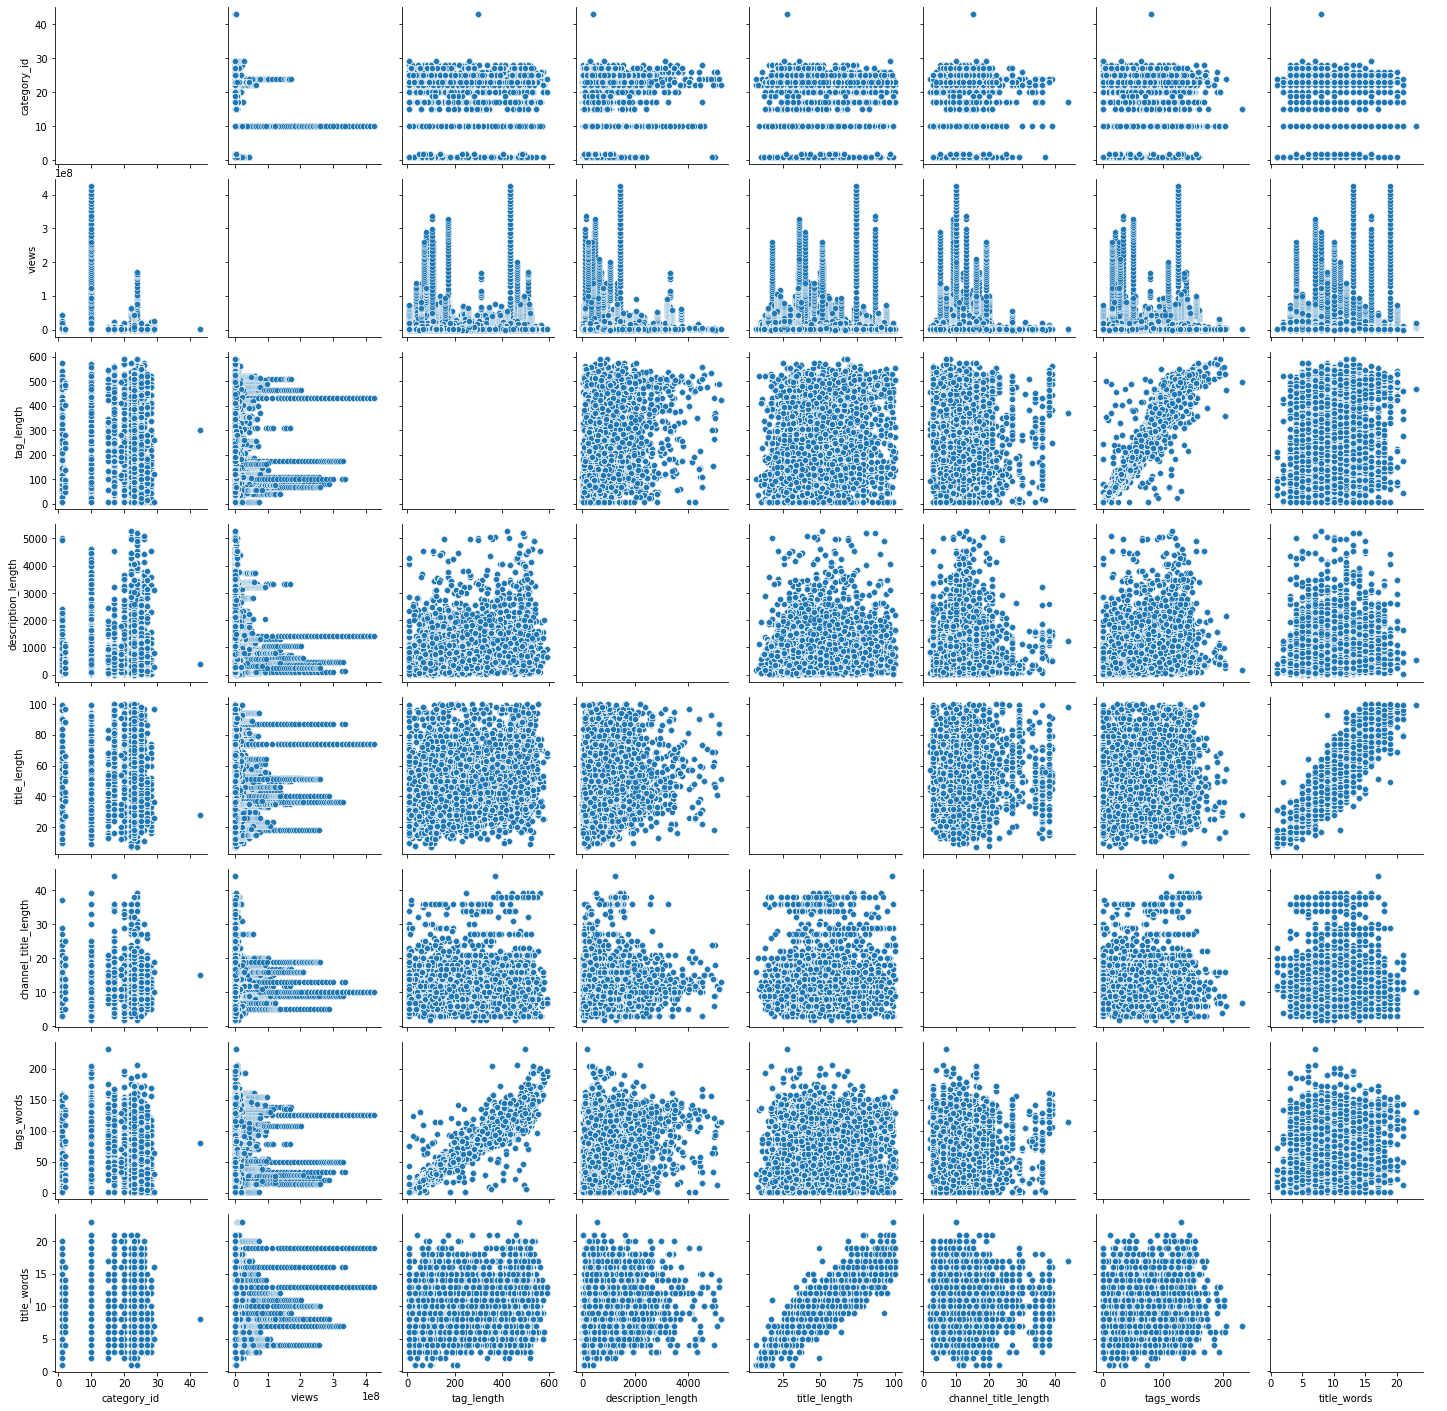

In [14]:
g = sns.PairGrid(newdf)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [15]:
X = newdf.drop(columns=["views"])
y = newdf['views']
# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()
X_cat


,category_names_length,Analysis_title,Analysis_tags,Analysis_descrp,category_names
video_id,,,,,
Jw1Y-zhQURU,13,Neutral,Neutral,Positive,Howto Style
Jw1Y-zhQURU,13,Neutral,Neutral,Positive,Howto Style
Jw1Y-zhQURU,13,Neutral,Neutral,Positive,Howto Style
Jw1Y-zhQURU,13,Neutral,Neutral,Positive,Howto Style
Jw1Y-zhQURU,13,Neutral,Neutral,Positive,Howto Style
...,...,...,...,...,...
j1oMVG1ZMlA,21,Neutral,Neutral,Negative,Nonprofits Activism
j1oMVG1ZMlA,21,Neutral,Neutral,Negative,Nonprofits Activism
j1oMVG1ZMlA,21,Neutral,Neutral,Negative,Nonprofits Activism


In [16]:
X = newdf.drop(columns=["views"])
y = newdf['views']


# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))

# 3. categorical pipeline
# 3.1 defining ordinal & onehot columns
ordinal_cols = X_cat.columns.get_indexer(["Analysis_title", "Analysis_tags", "Analysis_descrp"])
onehot_cols = X_cat.columns.get_indexer(["category_names"])

# 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = 20), ordinal_cols),
        ("cat_onehotenc", OneHotEncoder(sparse=False, handle_unknown="ignore"), onehot_cols)
    ]
)

# 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

pca = PCA()

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

pipeRDF = make_pipeline(preprocessor,
                     StandardScaler(),
                     pca,
                     RandomForestRegressor()
)
params = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "pca__n_components": [5, 15],
    "randomforestregressor__max_depth": [10, 20, 30],
    "randomforestregressor__min_samples_split": [2, 3, 4],
    "randomforestregressor__min_samples_leaf": [1, 2, 3]
}
randomf = GridSearchCV(pipeRDF,
                      params,
                      cv=4,
                      verbose=1)
randomf

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['category_id', 'tag_length', 'description_length', 'title_length',
       'channel_title_length', 'tags_words', 'title_words'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simp...
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforest

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=8)#,  stratify=y)


randomf.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['category_id', 'tag_length', 'description_length', 'title_length',
       'channel_title_length', 'tags_words', 'title_words'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simp...
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforest

In [18]:
scores = {"Rdf" : randomf.best_score_}

scores

{'Rdf': 0.8157038336272704}

In [19]:
scores["Rdf"] = randomf.best_params_

scores

{'Rdf': {'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
  'pca__n_components': 15,
  'randomforestregressor__max_depth': 30,
  'randomforestregressor__min_samples_leaf': 1,
  'randomforestregressor__min_samples_split': 3}}

In [20]:
randomf.predict(X_train) # Predictions

array([19403948.94016954, 22069206.23696618, 13353748.15135022, ...,
        3215457.45944751,  4562502.7701947 ,  1024099.36724972])

In [21]:
y_train_pred = randomf.predict(X_train)

In [22]:
randomf.predict(X_test)

array([  383289.3813526 ,   397695.37910999,  7763796.97091608, ...,
         177093.26671855, 17210591.97535035, 20487588.7572047 ])

In [23]:
randomf.score(X_train, y_train)

0.8407115057326536

In [24]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(randomf.predict(X_train)).reshape(-1, 1), y_train)

LinearRegression()

In [25]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(randomf.predict(X_test)).reshape(-1, 1)),#np.array(X_impute_test).reshape(-1, 1)), 
    'true_values':y_test
})
results.head()

,predictions,true_values
video_id,,
NUjLi_tm-aM,3.609125e+05,447222.0
1hX1KSKqVmo,3.753110e+05,435697.0
VaGcPRMY5UM,7.737595e+06,8788825.0
5fW5dsc0-5g,1.904647e+04,38807.0
tEnCoocmPQM,1.112506e+07,7252963.0


In [26]:
mod_res = {}
mod_res['1st_iter'] = {}

# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

1857973.689918166

In [ ]:
# check our results with sklearn metrics
mod_res['1st_iter']['rmse'] = mean_squared_error(results.true_values, results.predictions)**0.5
mod_res['1st_iter']['rmse']

In [ ]:
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']